# 3 Exploratory Data Analysis
## 3.2 Bivariate Data Analysis

In [1]:
# libraries
import os
import sys
import inspect
sys.path.append("../src")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

from shared import directories
from shared import filenames
from shared import variables
from analysis import trivariate
sys.path.append(directories.ANALYSIS_DIR)
sys.path.append(directories.UTILITIES_DIR)

import bivariate, independence, visual
import warnings
warnings.filterwarnings('ignore')

### 3.2.1 Get Data

In [2]:
df = pd.read_csv(os.path.join(directories.INTERIM_DATA_DIR,
                              filenames.INTERIM_FILENAME),
                 encoding="Latin-1", low_memory=False)
df_columns = pd.read_csv(os.path.join(directories.EXTERNAL_DATA_DIR,
                              filenames.COLUMNS_FILENAME),
                 encoding="Latin-1", low_memory=False)
df_labels = pd.read_csv(os.path.join(directories.EXTERNAL_DATA_DIR,
                              filenames.LABELS_FILENAME),
                 encoding="Latin-1", low_memory=False)

### 3.2.2 Decision Analysis 

#### 3.2.2.1 Dyadic Predictors

In [3]:
df_columns[df_columns['cat no.'] == 2][['column', 'description']]

,column,description
13,int_corr,Interests Correlation
14,samerace,Same Race
33,met_o,Has Partner met Subject Before
107,met,Has Subject Met Partner Before


##### 3.2.2.1.1 Interest Correlate
Doesn't appear to be a factor for decisions with or without controlling for gender. Both Kruskal and Anova do not reject the null hypothesis that mean correlation in interests is the same, regardless of decision. 

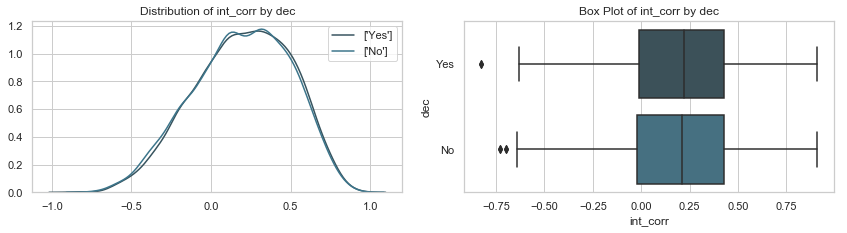

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
int_corr,Reject H0,No,4769.0,91,-0.73,-0.02,0.191229,0.21,0.43,0.91,0.135550,-7.101104,48.425675,0.0
int_corr,Reject H0,Yes,3451.0,67,-0.83,-0.01,0.202617,0.22,0.43,0.91,0.136683,-7.037533,47.526877,0.0


,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,int_corr,dec,H-Statistic,2.415535,0.120137,Fail to Reject
0,Anova,int_corr,dec,F Statistic,2.818717,0.093209,Fail to Reject


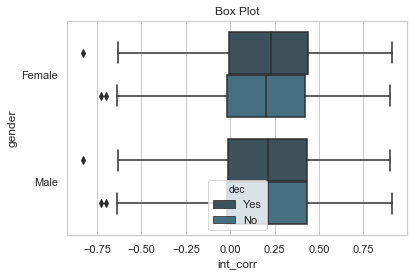

,gender,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
int_corr,Female,No,2606.0,49,-0.73,-0.0200,0.189693,0.20,0.42,0.90,0.134592,-7.155591,49.202476,0.0,Reject H0
int_corr,Female,Yes,1499.0,30,-0.83,-0.0050,0.207785,0.23,0.44,0.91,0.138693,-6.927242,45.986680,0.0,Reject H0
int_corr,Male,No,2163.0,42,-0.73,-0.0200,0.193079,0.21,0.43,0.91,0.136692,-7.037003,47.519417,0.0,Reject H0
int_corr,Male,Yes,1952.0,37,-0.83,-0.0125,0.198648,0.21,0.43,0.90,0.135116,-7.125708,48.775712,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
gender,0.006911,1.0,0.0750178,0.784173,9.12647e-06,-0.000112517
dec,0.265870,1.0,2.88588,0.0893969,0.000351089,0.000229404
gender:dec,0.077436,1.0,0.840525,0.359274,0.000102256,-1.9399e-05
Residuals,756.922324,8216.0,,,,


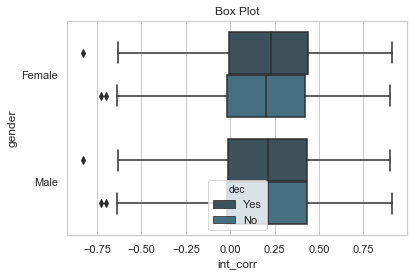

In [4]:
i, d, p = bivariate.analysis(df,x='int_corr', y='dec')
p
d
i
i, d, p = trivariate.analysis(df, x='gender', y='int_corr', z='dec')
p
d
i

##### 3.2.2.1.2 Same Race
Though there was a slight preference for same race among the female subjects, the association by decision and by decision, controlling for gender was very weak. 

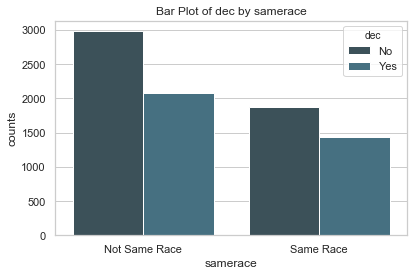

dec,No,Yes,All
samerace,,,
Not Same Race,2983,2079,5062
Same Race,1877,1439,3316
All,4860,3518,8378


,x,y,p-Value,Cramer's V,Strength,Result
0,samerace,dec,0.036986,0.016114,Very Weak Association,Significant


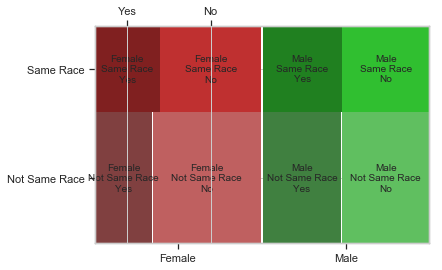

gender          Female                    Male          
samerace Not Same Race Same Race Not Same Race Same Race
dec                                                     
No            0.652811  0.606755      0.526025  0.525332
Yes           0.347189  0.393245      0.473975  0.474668

,x,y,z,p-Value,Cramer's V,Strength,Result
0,gender,samerace,dec,8.475808e-24,0.081215,Very Weak Association,Significant


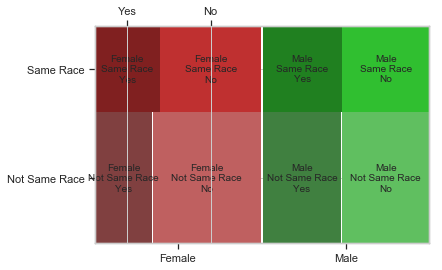

In [5]:
i, d, p = bivariate.analysis(df,x='samerace', y='dec')
p
d
i
i, d, p = trivariate.analysis(df, x='gender', y='samerace', z='dec')
p
d
i

##### 3.2.2.1.2 Met
Though prior meetings accounted for a small proportion, it would appear that such meetings were pleasant as a greater number of yes decisions are associated with prior meetings.

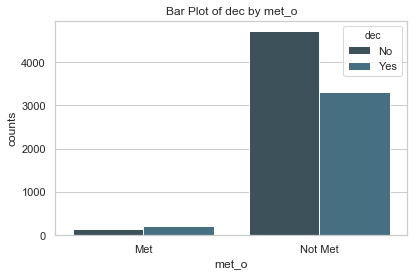

dec,No,Yes,All
met_o,,,
Met,143,207,350
Not Met,4717,3311,8028
All,4860,3518,8378


,x,y,p-Value,Cramer's V,Strength,Result
0,met_o,dec,4.502820e-11,0.050883,Very Weak Association,Significant


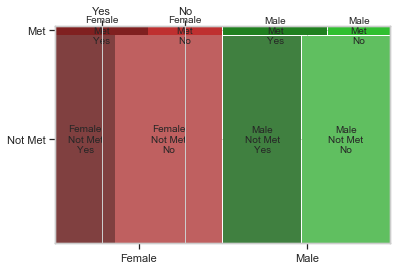

gender    Female                Male          
met_o        Met   Not Met       Met   Not Met
dec                                           
No      0.443114  0.642519  0.377049  0.532536
Yes     0.556886  0.357481  0.622951  0.467464

,x,y,z,p-Value,Cramer's V,Strength,Result
0,gender,met_o,dec,2.658645e-31,0.093136,Very Weak Association,Significant


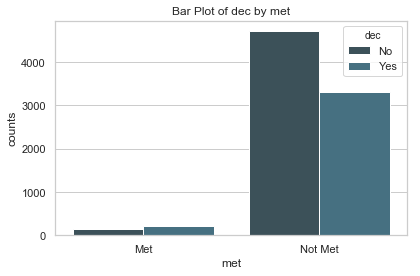

dec,No,Yes,All
met,,,
Met,138,213,351
Not Met,4722,3305,8027
All,4860,3518,8378


,x,y,p-Value,Cramer's V,Strength,Result
0,met,dec,6.289095e-13,0.055576,Very Weak Association,Significant


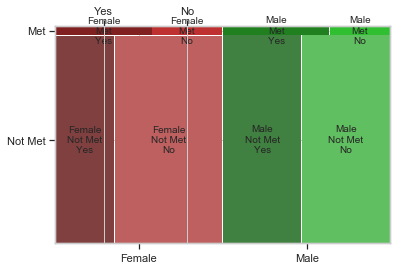

gender    Female                Male          
met          Met   Not Met       Met   Not Met
dec                                           
No      0.420765  0.644339  0.363095  0.532538
Yes     0.579235  0.355661  0.636905  0.467462

,x,y,z,p-Value,Cramer's V,Strength,Result
0,gender,met,dec,9.344985e-34,0.096712,Very Weak Association,Significant


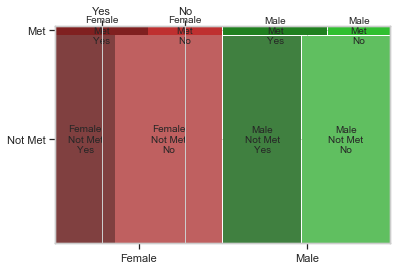

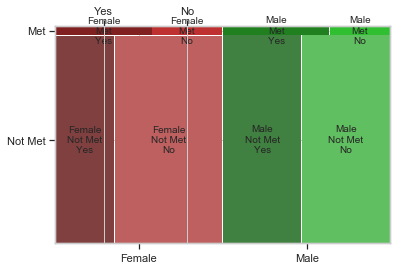

In [6]:
i, d, p = bivariate.analysis(df,x='met_o', y='dec')
p
d
i
i, d, p = trivariate.analysis(df, x='gender', y='met_o', z='dec')
p
d
i
i, d, p = bivariate.analysis(df,x='met', y='dec')
p
d
i
i, d, p = trivariate.analysis(df, x='gender', y='met', z='dec')
p
d
i

#### 3.2.2.2 Demographic Predictors

In [7]:
df_columns[df_columns['cat no.'] == 3][['column', 'description']]

,column,description
15,age_o,Age of Partner
16,age_diff,Difference in Age [Male-Female]
17,race_o,Race of Partner
34,age,Age of Subject
40,race,Race of Subject
43,from,From
44,zipcode,Zipcode From
45,income,Income 1990 Based on Zipcode


##### 3.2.2.2.1 Age
Age was not a decision factor in decision making.

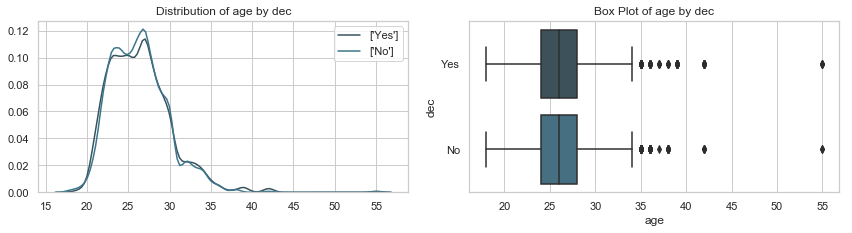

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
age,Reject H0,No,4794.0,66,18.0,24.0,26.310597,26.0,28.0,55.0,0.115740,-8.405363,68.650131,0.0
age,Reject H0,Yes,3489.0,29,18.0,24.0,26.425337,26.0,28.0,55.0,0.090418,-10.877438,116.318657,0.0


,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,age,dec,H-Statistic,0.026820,0.869913,Fail to Reject
0,Anova,age,dec,F Statistic,2.090024,0.148302,Fail to Reject


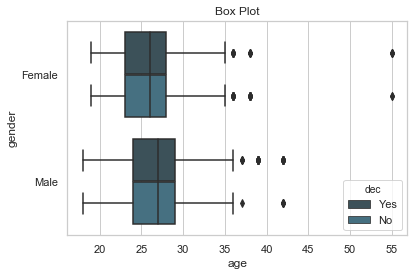

,gender,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
age,Female,No,2604.0,51,19.0,23.0,26.048003,26.0,28.0,55.0,0.137259,-7.005598,47.078409,0.0,Reject H0
age,Female,Yes,1515.0,14,19.0,23.0,26.205281,26.0,28.0,55.0,0.095250,-10.306480,104.223527,0.0,Reject H0
age,Male,No,2190.0,15,18.0,24.0,26.622831,27.0,29.0,42.0,0.082198,-12.000285,142.006849,0.0,Reject H0
age,Male,Yes,1974.0,15,18.0,24.0,26.594225,27.0,29.0,42.0,0.086514,-11.384533,127.607599,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
gender,505.518392,1.0,39.9302,2.76801e-10,0.0047988,0.00467806
dec,7.327642,1.0,0.5788,0.446805,6.95601e-05,-5.06136e-05
gender:dec,17.213548,1.0,1.35967,0.243628,0.000163405,4.32203e-05
Residuals,104812.589983,8279.0,,,,


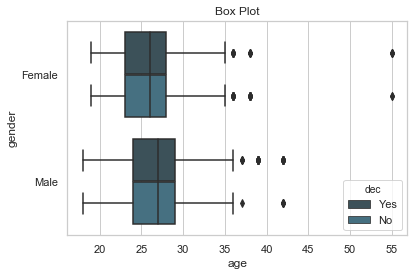

In [8]:
i, d, p = bivariate.analysis(df,x='age', y='dec')
p
d
i
i, d, p = trivariate.analysis(df, x='gender', y='age', z='dec')
p
d
i

##### 3.2.2.2.2 Age of Partner
The association between age of partner and decision, controlling for gender was statistically significant, but not practically significant. For females, those receiving a yes decision were on average, 2.4 months younger.  Approximately the same for males. 

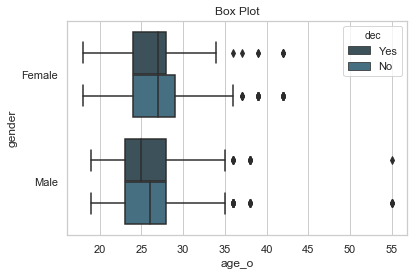

,gender,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
age_o,Female,No,2643.0,12,18.0,24.0,26.708286,27.0,29.0,42.0,0.067077,-14.773440,216.254540,0.0,Reject H0
age_o,Female,Yes,1512.0,17,18.0,24.0,26.470899,27.0,28.0,42.0,0.104856,-9.324828,84.952420,0.0,Reject H0
age_o,Male,No,2164.0,41,19.0,23.0,26.277726,26.0,28.0,55.0,0.135087,-7.127372,48.799434,0.0,Reject H0
age_o,Male,Yes,1955.0,34,19.0,23.0,25.915601,25.0,28.0,55.0,0.129622,-7.450999,53.517391,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
gender,475.746174,1.0,37.7135,8.57173e-10,0.00453141,0.00441072
dec,181.158973,1.0,14.3609,0.000151976,0.00172551,0.00160516
gender:dec,7.728304,1.0,0.61264,0.433818,7.36109e-05,-4.6537e-05
Residuals,104323.968695,8270.0,,,,


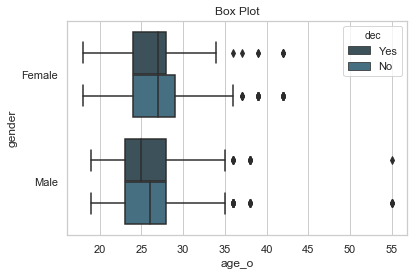

In [9]:
i, d, p = trivariate.analysis(df, x='gender', y='age_o', z='dec')
p
d
i

##### 3.2.2.2.3 Age Difference
Age difference was significant predictor of decision when controlling for gender, but for different reasons. For female subjects, the mean age difference for yes decisions was about 1/3rd that of no decisions. On the other hand; the mean age difference for yes decisions was about slightly more than half that for no decisions. It would appear that females were more sensitive to age differences than the males. It's worth adding that the mean for all genders and decisions was positive. This indicates that on average, male subjects were older than the female subjects. 

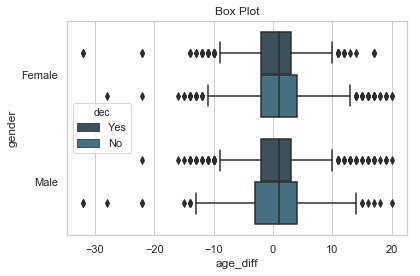

,gender,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
age_diff,Female,No,2592.0,63,-28.0,-2.0,0.663966,1.0,4.0,20.0,0.152203,-6.258367,37.167163,0.0,Reject H0
age_diff,Female,Yes,1498.0,31,-32.0,-2.0,0.281709,1.0,3.0,17.0,0.140938,-6.807590,44.343275,0.0,Reject H0
age_diff,Male,No,2149.0,56,-32.0,-3.0,0.390414,1.0,4.0,20.0,0.157327,-6.033329,34.401059,0.0,Reject H0
age_diff,Male,Yes,1941.0,48,-22.0,-2.0,0.671819,1.0,3.0,20.0,0.153461,-6.201792,36.462230,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
gender,0.035214,1.0,0.00156769,0.968418,1.91514e-07,-0.000121957
dec,2.925571,1.0,0.130243,0.71819,1.59109e-05,-0.000106239
gender:dec,216.553831,1.0,9.64071,0.00190962,0.00117774,0.00105545
Residuals,183652.824266,8176.0,,,,


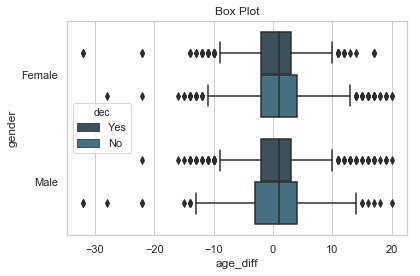

In [10]:
i, d, p = trivariate.analysis(df, x='gender', y='age_diff', z='dec')
p
d
i

##### 3.2.2.2.4 Race
Overall the association between race, gender and decision was weak. However:
- Asian females decided yes about 40% of the time; whereas Asian males did so about 1/2 the time
- African American females decided yes about 1/2 the time, males about 80% of the time
- Caucasians females were more selective. They had positive decisions about 1/3rd of the time. Men about 45%
- Latino females had a yes rate of about 38%.  Males about 45%.
- Other females matched Latino females.  Other males said yes about 57% of the time

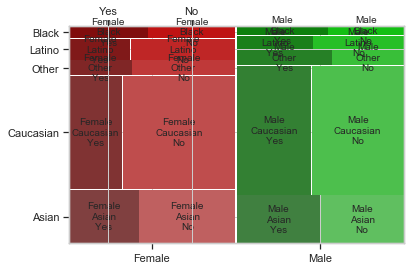

gender    Female                                              Male            \
race       Asian     Black Caucasian    Latino     Other     Asian     Black   
dec                                                                            
No      0.576077  0.522822   0.67739  0.627792  0.621528  0.497332  0.452514   
Yes     0.423923  0.477178   0.32261  0.372208  0.378472  0.502668  0.547486   

gender                                
race   Caucasian    Latino     Other  
dec                                   
No       0.55119  0.544061  0.427609  
Yes      0.44881  0.455939  0.572391

,x,y,z,p-Value,Cramer's V,Strength,Result
0,gender,race,dec,2.901336e-32,0.10119,Very Weak Association,Significant


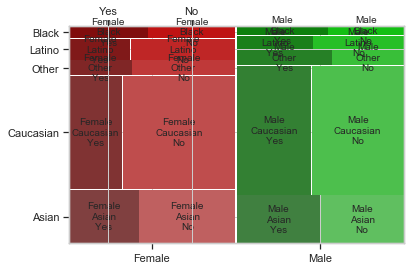

In [11]:
i, d, p = trivariate.analysis(df, x='gender', y='race', z='dec')
p
d
i

##### 3.2.2.2.2 Race of Partner
Overall decision by race, controlling for gender was significant. 
- Asian females received yes decisions about 25% of the time, males about 40%
- African american females received positive decisions 40% of the time, males about 45%
- Caucasian females had yes rates of about 40%, males 50%
- Latino females had yes rates of approximately 36%. Latino males slightly over 50%
- Other females received yesses about 1/3rd of the time, other males slightly less than half.

As we look at matches:
- African American females were chosen by African America females 89% of the time
- Male Latinos were chosen by 'Other' 74% of the time
- African American males were chosen by African American females 67% of the time.
- Male Latinos were chosen by African American females 63% of the time




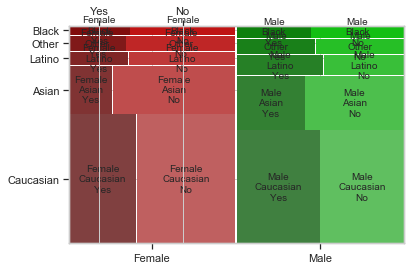

gender    Female                                              Male            \
race_o     Asian     Black Caucasian    Latino     Other     Asian     Black   
dec                                                                            
No      0.737406  0.631285  0.593638  0.639847  0.655405  0.592344  0.556017   
Yes     0.262594  0.368715  0.406362  0.360153  0.344595  0.407656  0.443983   

gender                                
race_o Caucasian    Latino     Other  
dec                                   
No       0.49932  0.478908  0.526846  
Yes      0.50068  0.521092  0.473154

,x,y,z,p-Value,Cramer's V,Strength,Result
0,gender,race_o,dec,3.988830e-36,0.106504,Very Weak Association,Significant


,"(Female, Asian)","(Female, Black)","(Female, Caucasian)","(Female, Latino)","(Female, Other)","(Male, Asian)","(Male, Black)","(Male, Caucasian)","(Male, Latino)","(Male, Other)"
Asian,0.412500,0.422222,0.437601,0.389831,0.380952,0.462500,0.448276,0.535865,0.470000,0.507692
Caucasian,0.181435,0.273684,0.384728,0.272059,0.278571,0.376013,0.419580,0.475037,0.511013,0.444444
Other,0.245902,0.454545,0.415663,0.458333,0.346154,0.535714,0.600000,0.571429,0.741935,0.481481
Latino,0.250000,0.421053,0.400881,0.500000,0.419355,0.322034,0.375000,0.500000,0.461538,0.583333
Black,0.344828,0.888889,0.475524,0.625000,0.600000,0.422222,0.666667,0.589474,0.631579,0.454545


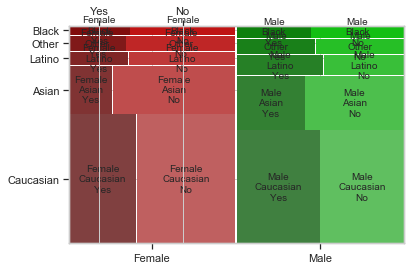

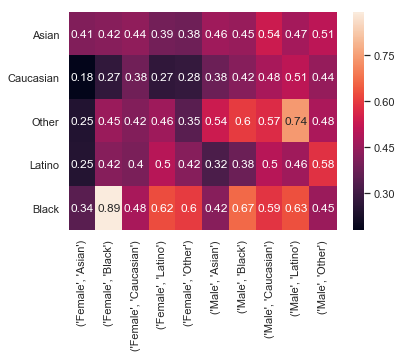

In [13]:
i, d, p = trivariate.analysis(df, x='gender', y='race_o', z='dec')
p
d
i
rm, p = trivariate.race_match(df)
rm